In [43]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

In [44]:
# Load the image in the dataset
for dirname, _, filenames in os.walk('../dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
# Checking amount of each image in the dataset
directories = {
    'ba_dir': './dataset/v3/v3/train/ba',
    'ca_dir': './dataset/v3/v3/train/ca',
    'da_dir': './dataset/v3/v3/train/da',
    'dha_dir': './dataset/v3/v3/train/dha',
    'ga_dir': './dataset/v3/v3/train/ga',
    'ha_dir': './dataset/v3/v3/train/ha',
    'ja_dir': './dataset/v3/v3/train/ja',
    'ka_dir': './dataset/v3/v3/train/ka',
    'la_dir': './dataset/v3/v3/train/la',
    'ma_dir': './dataset/v3/v3/train/ma',
    'na_dir': './dataset/v3/v3/train/na',
    'nga_dir': './dataset/v3/v3/train/nga',
    'nya_dir': './dataset/v3/v3/train/nya',
    'pa_dir': './dataset/v3/v3/train/pa',
    'ra_dir': './dataset/v3/v3/train/ra',
    'sa_dir': './dataset/v3/v3/train/sa',
    'ta_dir': './dataset/v3/v3/train/ta',
    'tha_dir': './dataset/v3/v3/train/tha',
    'wa_dir': './dataset/v3/v3/train/wa',
    'ya_dir': './dataset/v3/v3/train/ya',
}

for directory_name, directory_path in directories.items():
    file_count = len(os.listdir(directory_path))
    print(f"Total training {directory_name.split('_')[0]} images: {file_count}")

Total training ba images: 528
Total training ca images: 531
Total training da images: 525
Total training dha images: 518
Total training ga images: 506
Total training ha images: 518
Total training ja images: 518
Total training ka images: 520
Total training la images: 518
Total training ma images: 520
Total training na images: 520
Total training nga images: 519
Total training nya images: 530
Total training pa images: 519
Total training ra images: 517
Total training sa images: 525
Total training ta images: 517
Total training tha images: 519
Total training wa images: 519
Total training ya images: 520


In [46]:
# check shape of the image
import cv2

for filename in os.listdir(directories.get('ba_dir')):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path using os.path.join
        file_path = os.path.join(directories.get('ba_dir'), filename)

        # Read the image using OpenCV
        image = cv2.imread(file_path)

        # Check the shape of the image
        print(f"Shape of {filename}: {image.shape}")

Shape of 4693653993842849134_base64_45.png: (300, 306, 3)
Shape of 4693761962226194636_base64_45.png: (300, 306, 3)
Shape of 4693859050223721713_base64_45.png: (300, 306, 3)
Shape of 4693920961552490237_base64_45.png: (300, 306, 3)
Shape of 4693965285124341042_base64_45.png: (300, 306, 3)
Shape of 4693968902229116726_base64_45.png: (300, 306, 3)
Shape of 4693970800717150257_base64_45.png: (300, 306, 3)
Shape of 4693972276023610388_base64_45.png: (300, 336, 3)
Shape of 4693979959028129056_base64_45.png: (300, 306, 3)
Shape of 4693980454196420991_base64_45.png: (300, 336, 3)
Shape of 4693994525204880519_base64_45.png: (300, 306, 3)
Shape of 4694013554511662186_base64_45.png: (300, 306, 3)
Shape of 4694018468818034705_base64_45.png: (300, 306, 3)
Shape of 4694023059412567494_base64_45.png: (300, 306, 3)
Shape of 4694023996151870117_base64_45.png: (300, 336, 3)
Shape of 4694044299313201617_base64_45.png: (300, 306, 3)
Shape of 4694048764327739699_base64_45.png: (300, 336, 3)
Shape of 46940

Sample 'wa' image:


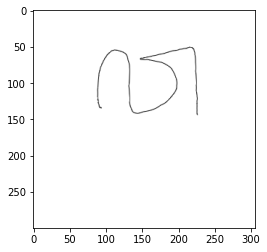

Sample 'ca' image:


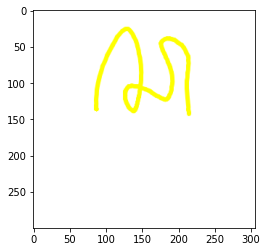

In [47]:
# example of the 'wa' letter on the dataset

print("Sample 'wa' image:")
plt.imshow(load_img(f"{os.path.join(directories.get('wa_dir'), os.listdir(directories.get('wa_dir'))[6])}"))
plt.show()

# example of the 'ca' letter on the dataset
print("Sample 'ca' image:")
plt.imshow(load_img(f"{os.path.join(directories.get('ca_dir'), os.listdir(directories.get('ca_dir'))[5])}"))
plt.show()

In [48]:
# Doing some data Augmentation to tackle overfitting problems

TRAIN_DIR = './dataset/v3/v3/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = './dataset/v3/v3/val/'
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [49]:
# Create data generator that will be fed into model.fit

train_generator = training_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 32
)

Found 10406 images belonging to 20 classes.
Found 3171 images belonging to 20 classes.


In [50]:
# Import the Inception Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create the variable that will be used as instance of local pre-trained weights
local_weights_file = '../tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [51]:
# Create the requirement of pre-trained models to use later while train the model
pre_trained_model = InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = None
)

# load the weights that have been imported from the tmp folder
pre_trained_model.load_weights(local_weights_file)

# Makeing all of the pre-trained models cant be trained
for layer in pre_trained_model.layers:
    layer.trainable = False

In [52]:
#  Summary of pre-trained data
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [53]:
# verified that nothing layers in Inception V3 can be train
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 0 trainable parameters in this model.


In [54]:
# Create a Callback class that stops training once accuracy reaches 85%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so training is cancelled!")
      self.model.stop_training = True

In [55]:
# Using layer 'mixed7' to use in training model
last_desired_layer = pre_trained_model.get_layer('mixed7')
last_output = last_desired_layer.output

print(last_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [92]:
# Create the function final model that contain pre_trained_model from InceptionV3 also addition of output layer
def final_model(pre_trained_model, last_output):
    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation = "relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(20, activation = 'sigmoid')(x)

    model = Model(pre_trained_model.input, x)

    model.compile(
        optimizer = RMSprop(learning_rate = 0.0001),
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [93]:
# Create a 'model' variable to save the model
model = final_model(pre_trained_model, last_output)

# Inspect the parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,531,956 total parameters in this model.
There are 38,556,692 trainable parameters in this model.


In [96]:
callbacks = myCallback()
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks = callbacks
)

Epoch 1/100
326/326 - 244s - loss: 0.2516 - accuracy: 0.9230 - val_loss: 0.3060 - val_accuracy: 0.9048 - 244s/epoch - 748ms/step
Epoch 2/100
326/326 - 208s - loss: 0.2538 - accuracy: 0.9183 - val_loss: 0.3547 - val_accuracy: 0.8915 - 208s/epoch - 637ms/step
Epoch 3/100
326/326 - 205s - loss: 0.2521 - accuracy: 0.9203 - val_loss: 0.3219 - val_accuracy: 0.8959 - 205s/epoch - 629ms/step
Epoch 4/100
326/326 - 207s - loss: 0.2434 - accuracy: 0.9228 - val_loss: 0.3947 - val_accuracy: 0.8849 - 207s/epoch - 634ms/step
Epoch 5/100
326/326 - 207s - loss: 0.2416 - accuracy: 0.9236 - val_loss: 0.2929 - val_accuracy: 0.9123 - 207s/epoch - 636ms/step
Epoch 6/100
326/326 - 206s - loss: 0.2440 - accuracy: 0.9224 - val_loss: 0.2805 - val_accuracy: 0.9079 - 206s/epoch - 631ms/step
Epoch 7/100
326/326 - 206s - loss: 0.2443 - accuracy: 0.9216 - val_loss: 0.3133 - val_accuracy: 0.8975 - 206s/epoch - 631ms/step
Epoch 8/100
326/326 - 204s - loss: 0.2353 - accuracy: 0.9229 - val_loss: 0.2647 - val_accuracy: 0

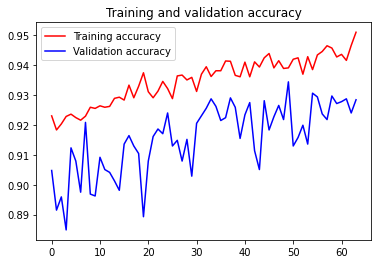

<Figure size 432x288 with 0 Axes>

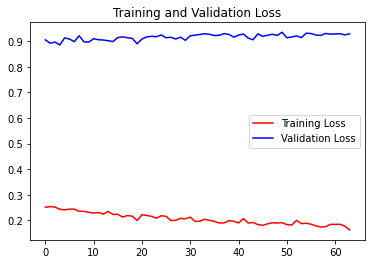

<Figure size 432x288 with 0 Axes>

In [98]:
# Plot the training and validation accuracies for each epoch
# Accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()



In [99]:
# Save the model
destination_path = '../model/'
file_name = 'model.h5'
model.save(destination_path + file_name)

In [100]:
# Function to pre-process images into array
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(150, 150))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [101]:
# Function to load the model 
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

In [102]:
# Function to predict the image
def predict_image(model, image):
    prediction = model.predict(image)
    return prediction

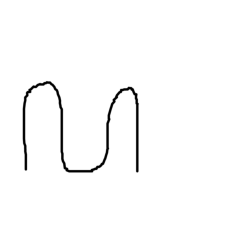

In [118]:
import matplotlib.image as mpimg
model_path = '../model/model.h5'
image_path = './dataset/assets/coba.png'
image_show = mpimg.imread(image_path)
plt.imshow(image_show)
plt.axis('off')
plt.show()

In [119]:
# Doing some test on image dataset
model = load_model(model_path)
preprocessed_image = preprocess_image(image_path)
prediction = predict_image(model, preprocessed_image)

1/1 [==============================] - 1s 1s/step


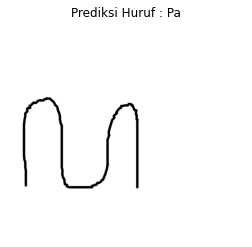

In [120]:
# Tampilkan hasil prediksi
class_labels = ["Ba", "Ca", "Da", "Dha", 'Ga', 'Ha', 'Ja', 'Ka', 'La', 'Ma', 'Na', 'Nga', 'Nya', 'Pa', 'Ra', 'Sa', 'Ta', 'Tha', 'Wa', 'Ya'] 
predicted_class = np.argmax(prediction)
predicted_label = class_labels[predicted_class]
image_show = mpimg.imread(image_path)
plt.imshow(image_show)
plt.axis('off')
plt.title(f"Prediksi Huruf : {predicted_label}")
plt.show()